In [1]:
import sys
import gastrodon as gas
from gastrodon import RemoteEndpoint,QName,ttl,URIRef,inline, GastrodonException
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline 

pd.options.display.width=120
pd.options.display.max_colwidth=100

In [2]:
#gathered from http://dbpedia.org/sparql?help=nsdecl
prefixes=inline("""
    @prefix : <http://dbpedia.org/resource/> .
    @prefix dbo: <http://dbpedia.org/ontology/> .
    @prefix dbp: <http://dbpedia.org/property/> .
    @prefix dbc: <http://dbpedia.org/resource/Category:> .
    @prefix dbr: <http://dbpedia.org/resource/> .
    @prefix foaf: <http://xmlns.com/foaf/0.1/> .

""").graph

In [3]:
endpoint=RemoteEndpoint(
    "http://dbpedia.org/sparql/"
    ,default_graph="http://dbpedia.org"
    ,prefixes=prefixes
    ,base_uri="http://dbpedia.org/resource/"
)

In [4]:
try:
    endpoint.select("""
        SELECT ?movie ?budget ?gross 
    WHERE {
        ?movie rdf:type dbo:Film .
        ?movie dbo:starring dbr:Dwayne_Johnson(actor)} .
        OPTIONAL {
            ?movie dbo:gross ?gross

        } OPTIONAL{
        ?movie dbo:budget ?budget
    }
    }
    """)
except GastrodonException as e:
        print("stuff")

stuff


In [5]:
#Finding it via actor name
endpoint.select("""
    SELECT ?movie ?budget ?gross 
WHERE {
    ?movie rdf:type dbo:Film .
    ?movie dbo:starring dbr:Dwayne_Johnson .
    OPTIONAL {
        ?movie dbo:gross ?gross
        
    } OPTIONAL{
    ?movie dbo:budget ?budget
}
}
""")


,movie,budget,gross
0,<Tooth_Fairy_(2010_film)>,4.8E7,1.125E8
1,<Southland_Tales>,1.7E7,374743.0
2,<Gridiron_Gang>,3.0E7,1.79480851E8
3,<San_Andreas_(film)>,1.1E8,4.74E8
4,<Snitch_(film)>,1.5E7,5.78E7
5,<Empire_State_(2013_film)>,1.1E7,3700000.0
6,<Be_Cool>,5.3E7,9.52E7
7,<Planet_51>,4.9E7,1.056E8
8,<Faster_(2010_film)>,2.4E7,3.56E7
9,<Race_to_Witch_Mountain>,5.0E7,1.064E8


In [6]:
endpoint.select("""
    SELECT ?movie ?budget ?gross 
WHERE {
    ?movie rdf:type dbo:Film .
    ?movie dbo:starring <http://dbpedia.org/resource/Dwayne_Johnson>
    OPTIONAL {
        ?movie dbo:gross ?gross
        
    } OPTIONAL{
    ?movie dbo:budget ?budget
}
}
""")

,movie,budget,gross
0,<Tooth_Fairy_(2010_film)>,4.8E7,1.125E8
1,<Southland_Tales>,1.7E7,374743.0
2,<Gridiron_Gang>,3.0E7,1.79480851E8
3,<San_Andreas_(film)>,1.1E8,4.74E8
4,<Snitch_(film)>,1.5E7,5.78E7
5,<Empire_State_(2013_film)>,1.1E7,3700000.0
6,<Be_Cool>,5.3E7,9.52E7
7,<Planet_51>,4.9E7,1.056E8
8,<Faster_(2010_film)>,2.4E7,3.56E7
9,<Race_to_Witch_Mountain>,5.0E7,1.064E8


In [7]:
#Finding it by the dbr film name
_sparqlSelect = """SELECT ?actor ?gender  WHERE {   
        <http://dbpedia.org/resource/Thor_(film)> dbo:starring ?actor
        OPTIONAL{
            ?actor foaf:gender ?gender
        }
        }"""

actors = endpoint.select(_sparqlSelect)
actors

,actor,gender
0,<Natalie_Portman>,female
1,<Chris_Hemsworth>,male
2,<Colm_Feore>,male
3,<Anthony_Hopkins>,male
4,<Tom_Hiddleston>,male
5,<Idris_Elba>,male
6,<Kat_Dennings>,female
7,<Rene_Russo>,female
8,<Stellan_Skarsgård>,male
9,<Ray_Stevenson_(actor)>,male


In [8]:
type(endpoint)


gastrodon.RemoteEndpoint

In [9]:
theRock=endpoint.select("""
    SELECT ?movie ?actor
WHERE {
?movie rdf:type dbo:Film .
?movie dbo:starring dbr:Dwayne_Johnson .
?movie dbo:starring ?actor
}
""")


In [10]:

movieList = set(theRock.movie)
theRock['movie'] = theRock['movie'].astype(str)
theRock['actor'] = theRock['actor'].astype(str)
type(theRock.loc[len(theRock)-1]['movie'])


str

In [11]:
RockGraph = nx.from_pandas_edgelist(theRock, source ='actor',target='movie', edge_attr=True,create_using=nx.DiGraph())

color_map = []
for node in RockGraph:
    if node in movieList:
        color_map.append('green')
    else: 
        color_map.append('red')      


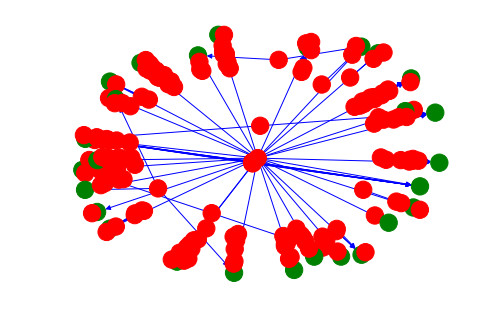

In [12]:
nx.draw(RockGraph, with_labels = False,node_color=color_map, edge_color='b')

In [13]:

#Returns a projected graph of an actor
def getActorGraph(actor,endpoint,flag = False):
    #insert the actor name for the dbr:{actor name} in the query
    if(flag):
        
        query = ['''SELECT ?movie ?actor 
        WHERE { ?movie rdf:type dbo:Film .
        ?movie dbo:starring <http://dbpedia.org/resource/''',
                 actor,'''> . 
        ?movie dbo:starring ?actor}''']
        
    else:
        query = ['''SELECT ?actor ?movie 
        WHERE { ?movie rdf:type dbo:Film .
        ?movie dbo:starring dbr:''',
                 actor,''' . 
        ?movie dbo:starring ?actor}''']
        
    query = ''.join(query) #combine the string
    myDataFrame = endpoint.select(query)
    print(myDataFrame)
    
    #convert from Gastrodon type to str
    myDataFrame['movie'] = myDataFrame['movie'].astype(str)
    myDataFrame['actor'] = myDataFrame['actor'].astype(str)
    
    #Slice off the < > signs
    myDataFrame['actor'] = myDataFrame['actor'].str.slice(1,-1)
    
    myMovieList = set(myDataFrame.movie)
    #Generate graph as Directed Graph
    myGraph = nx.from_pandas_edgelist(myDataFrame, source ='actor',target='movie', edge_attr=True)
    
    #Generate bipartite attributes
    for node in myGraph:
        if node in myMovieList:
            myGraph.node[node]['bipartite'] = 0
        else: 
            myGraph.node[node]['bipartite'] = 1
            
    
    #bipartite creation and filtering from lecture
    actors = [node for node, node_data in myGraph.nodes(data=True) if node_data['bipartite']==1]
    actorProjection = nx.bipartite.weighted_projected_graph(myGraph, actors)
    
    filtered = nx.Graph(actorProjection)
    to_remove = [(n1, n2) for n1, n2, data in actorProjection.edges(data=True) if data['weight'] < 2]

    filtered.remove_edges_from(to_remove)
    
    giant_cc_nodes = max(nx.connected_components(filtered), key=len)
    filtered2 = filtered.subgraph(giant_cc_nodes)
    
    return (filtered2)
    

    #To use this function, create a variable, put in the endpoint and actor name
    #VERY IMPORTANT, use the name found in the dbpedia website with underscores
    #for example, the site http://dbpedia.org/page/Dwayne_Johnson the person is Dwayne_Johnson
    #Same thing for other actors like http://dbpedia.org/page/Will_Ferrell   is Will_Ferrell


In [14]:
#Important! The third argument is an optional argument that limits how much data we get
#There is no sorting, so the way they are returned is arbitrary
DwayneJ = getActorGraph("Dwayne_Johnson",endpoint)
#nx.draw(myData[0], with_labels=True, node_color=myData[1])

#Export as a graphml!
#update, no longer a tuple, just returns a filtered graph
#write_graphml takes (Graph,<fileName>)

#<UNCOMMENT THIS LINE  VVV>

nx.write_graphml(DwayneJ, "DwayneJFULL.graphml")

#<UNCOMMENT THAT LINE ^^^^

                          actor                       movie
0                 <Ashley_Judd>   <Tooth_Fairy_(2010_film)>
1            <Stephen_Merchant>   <Tooth_Fairy_(2010_film)>
2               <Julie_Andrews>   <Tooth_Fairy_(2010_film)>
3              <Dwayne_Johnson>   <Tooth_Fairy_(2010_film)>
4               <Wallace_Shawn>           <Southland_Tales>
5          <Miranda_Richardson>           <Southland_Tales>
6       <Sarah_Michelle_Gellar>           <Southland_Tales>
7           <Justin_Timberlake>           <Southland_Tales>
8                    <Bai_Ling>           <Southland_Tales>
9                 <Mandy_Moore>           <Southland_Tales>
10             <Dwayne_Johnson>           <Southland_Tales>
11        <Seann_William_Scott>           <Southland_Tales>
12                     <Xzibit>             <Gridiron_Gang>
13                 <Kevin_Dunn>             <Gridiron_Gang>
14             <Dwayne_Johnson>             <Gridiron_Gang>
15                 <Leon_Rippy>         

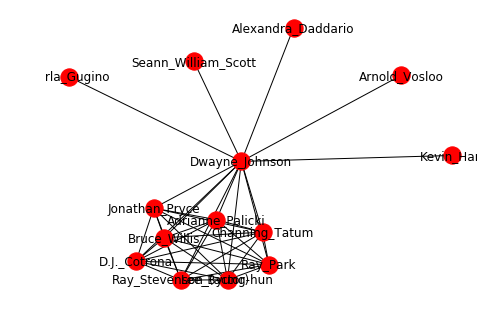

In [15]:

nx.draw(DwayneJ, with_labels=True)

                      actor                                movie
0        <Juliette_Binoche>     <Ghost_in_the_Shell_(2017_film)>
1            <Michael_Pitt>     <Ghost_in_the_Shell_(2017_film)>
2      <Scarlett_Johansson>     <Ghost_in_the_Shell_(2017_film)>
3             <Pilou_Asbæk>     <Ghost_in_the_Shell_(2017_film)>
4             <Ng_Chin_Han>     <Ghost_in_the_Shell_(2017_film)>
5          <Takeshi_Kitano>     <Ghost_in_the_Shell_(2017_film)>
6         <Lasarus_Ratuere>     <Ghost_in_the_Shell_(2017_film)>
7               <Sam_Neill>         <The_Horse_Whisperer_(film)>
8            <Dianne_Wiest>         <The_Horse_Whisperer_(film)>
9      <Scarlett_Johansson>         <The_Horse_Whisperer_(film)>
10         <Robert_Redford>         <The_Horse_Whisperer_(film)>
11   <Kristin_Scott_Thomas>         <The_Horse_Whisperer_(film)>
12       <Nastassja_Kinski>               <An_American_Rhapsody>
13     <Scarlett_Johansson>               <An_American_Rhapsody>
14            <Mae_Whitma

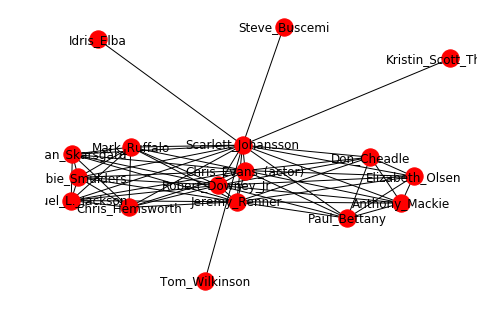

In [16]:
sJo = getActorGraph("Scarlett_Johansson",endpoint)
nx.write_graphml(sJo, "sJo.graphml")
nx.draw(sJo, with_labels=True)

This section recurses, and finds and combines the graphs of the next depth from our main actors
<WIP> TODO: need to define a function, so that recursion will be automatic

                        actor                           movie
0    <Roger_Robinson_(actor)>     <Brother_to_Brother_(film)>
1            <Anthony_Mackie>     <Brother_to_Brother_(film)>
2           <Michael_Shannon>  <The_Night_Before_(2015_film)>
3      <Joseph_Gordon-Levitt>  <The_Night_Before_(2015_film)>
4            <Anthony_Mackie>  <The_Night_Before_(2015_film)>
5              <Mindy_Kaling>  <The_Night_Before_(2015_film)>
6              <Lizzy_Caplan>  <The_Night_Before_(2015_film)>
7              <Jillian_Bell>  <The_Night_Before_(2015_film)>
8              <Ryan_Gosling>            <Half_Nelson_(film)>
9             <Shareeka_Epps>            <Half_Nelson_(film)>
10           <Anthony_Mackie>            <Half_Nelson_(film)>
11           <Gillian_Jacobs>         <Black_or_White_(film)>
12          <Octavia_Spencer>         <Black_or_White_(film)>
13            <Kevin_Costner>         <Black_or_White_(film)>
14           <Anthony_Mackie>         <Black_or_White_(film)>
15      

                      actor                         movie
0              <Idris_Elba>    <No_Good_Deed_(2014_film)>
1        <Taraji_P._Henson>    <No_Good_Deed_(2014_film)>
2        <Cherine_Anderson>        <One_Love_(2003_film)>
3           <Vas_Blackwood>        <One_Love_(2003_film)>
4              <Idris_Elba>        <One_Love_(2003_film)>
5          <Ky-Mani_Marley>        <One_Love_(2003_film)>
6           <Eriq_Ebouaney>         <Bastille_Day_(film)>
7     <José_Garcia_(actor)>         <Bastille_Day_(film)>
8              <Idris_Elba>         <Bastille_Day_(film)>
9          <Richard_Madden>         <Bastille_Day_(film)>
10       <Charlotte_Le_Bon>         <Bastille_Day_(film)>
11         <Robert_Carlyle>              <28_Weeks_Later>
12           <Imogen_Poots>              <28_Weeks_Later>
13    <Catherine_McCormack>              <28_Weeks_Later>
14             <Idris_Elba>              <28_Weeks_Later>
15             <Rose_Byrne>              <28_Weeks_Later>
16       <Haro

                                    movie                        actor
0    <A_Guide_to_Recognizing_Your_Saints>               <Melonie_Diaz>
1    <A_Guide_to_Recognizing_Your_Saints>               <Dianne_Wiest>
2    <A_Guide_to_Recognizing_Your_Saints>             <Rosario_Dawson>
3    <A_Guide_to_Recognizing_Your_Saints>               <Shia_LaBeouf>
4    <A_Guide_to_Recognizing_Your_Saints>           <Chazz_Palminteri>
5    <A_Guide_to_Recognizing_Your_Saints>               <Eric_Roberts>
6    <A_Guide_to_Recognizing_Your_Saints>          <Robert_Downey_Jr.>
7    <A_Guide_to_Recognizing_Your_Saints>             <Channing_Tatum>
8                                <Game_6>              <Griffin_Dunne>
9                                <Game_6>          <Robert_Downey_Jr.>
10                               <Game_6>             <Michael_Keaton>
11                               <Game_6>              <Shalom_Harlow>
12              <Avengers:_Age_of_Ultron>          <Samuel_L._Jackson>
13    

                      actor                                movie
0        <Juliette_Binoche>     <Ghost_in_the_Shell_(2017_film)>
1            <Michael_Pitt>     <Ghost_in_the_Shell_(2017_film)>
2      <Scarlett_Johansson>     <Ghost_in_the_Shell_(2017_film)>
3             <Pilou_Asbæk>     <Ghost_in_the_Shell_(2017_film)>
4             <Ng_Chin_Han>     <Ghost_in_the_Shell_(2017_film)>
5          <Takeshi_Kitano>     <Ghost_in_the_Shell_(2017_film)>
6         <Lasarus_Ratuere>     <Ghost_in_the_Shell_(2017_film)>
7               <Sam_Neill>         <The_Horse_Whisperer_(film)>
8            <Dianne_Wiest>         <The_Horse_Whisperer_(film)>
9      <Scarlett_Johansson>         <The_Horse_Whisperer_(film)>
10         <Robert_Redford>         <The_Horse_Whisperer_(film)>
11   <Kristin_Scott_Thomas>         <The_Horse_Whisperer_(film)>
12       <Nastassja_Kinski>               <An_American_Rhapsody>
13     <Scarlett_Johansson>               <An_American_Rhapsody>
14            <Mae_Whitma

                         actor                                                         movie
0             <Robert_Carlyle>                                              <28_Weeks_Later>
1               <Imogen_Poots>                                              <28_Weeks_Later>
2        <Catherine_McCormack>                                              <28_Weeks_Later>
3                 <Idris_Elba>                                              <28_Weeks_Later>
4                 <Rose_Byrne>                                              <28_Weeks_Later>
5           <Harold_Perrineau>                                              <28_Weeks_Later>
6              <Jeremy_Renner>                                              <28_Weeks_Later>
7             <Christian_Bale>                                             <American_Hustle>
8                  <Amy_Adams>                                             <American_Hustle>
9             <Bradley_Cooper>                                        

                              actor                  movie
0                   <Albert_Finney>  <Traffic_(2000_film)>
1                    <Dennis_Quaid>  <Traffic_(2000_film)>
2                  <Benjamin_Bratt>  <Traffic_(2000_film)>
3             <Clifton_Collins_Jr.>  <Traffic_(2000_film)>
4                    <Tomas_Milian>  <Traffic_(2000_film)>
5                     <Luis_Guzmán>  <Traffic_(2000_film)>
6                <Benicio_del_Toro>  <Traffic_(2000_film)>
7                   <Miguel_Ferrer>  <Traffic_(2000_film)>
8               <Erika_Christensen>  <Traffic_(2000_film)>
9                   <Peter_Riegert>  <Traffic_(2000_film)>
10                  <D._W._Moffett>  <Traffic_(2000_film)>
11                     <Amy_Irving>  <Traffic_(2000_film)>
12                <Michael_Douglas>  <Traffic_(2000_film)>
13                   <James_Brolin>  <Traffic_(2000_film)>
14           <Catherine_Zeta-Jones>  <Traffic_(2000_film)>
15                    <Don_Cheadle>  <Traffic_(2000_film

                         actor                          movie
0               <Maggie_Smith>           <My_Old_Lady_(film)>
1            <Dominique_Pinon>           <My_Old_Lady_(film)>
2                <Kevin_Kline>           <My_Old_Lady_(film)>
3       <Kristin_Scott_Thomas>           <My_Old_Lady_(film)>
4                  <Sam_Neill>   <The_Horse_Whisperer_(film)>
5               <Dianne_Wiest>   <The_Horse_Whisperer_(film)>
6         <Scarlett_Johansson>   <The_Horse_Whisperer_(film)>
7             <Robert_Redford>   <The_Horse_Whisperer_(film)>
8       <Kristin_Scott_Thomas>   <The_Horse_Whisperer_(film)>
9              <Alec_Guinness>     <A_Handful_of_Dust_(film)>
10           <Anjelica_Huston>     <A_Handful_of_Dust_(film)>
11                <Judi_Dench>     <A_Handful_of_Dust_(film)>
12               <James_Wilby>     <A_Handful_of_Dust_(film)>
13             <Rupert_Graves>     <A_Handful_of_Dust_(film)>
14      <Kristin_Scott_Thomas>     <A_Handful_of_Dust_(film)>
15      

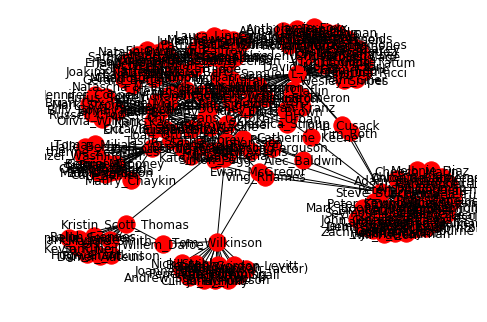

In [17]:
CompositeGraph = nx.Graph()
CompositeGraph = nx.compose(CompositeGraph,sJo)
#print(CompositeGraph.size());
#nx.draw(CompositeGraph,with_labels = True)   
invalidName = []
for actor in sJo:
    #print(actor);
    #Filter out the bad characters
    if((re.search( '[*\(\)\.]', actor)) == None):
        nGraph = getActorGraph(actor,endpoint)
       # print(nGraph.size());
    else:
        nGraph = getActorGraph(actor,endpoint,True)
        invalidName.append(actor)
    CompositeGraph = nx.compose(nGraph,CompositeGraph);
#print(CompositeGraph.size());
#for actor in invalidName:
    
nx.draw(CompositeGraph,with_labels = True)

nx.write_graphml(CompositeGraph, "Depth2Scarlett.graphml")

                     actor                           movie
0        <Craig_T._Nelson>                      <Get_Hard>
1                   <T.I.>                      <Get_Hard>
2            <Alison_Brie>                      <Get_Hard>
3             <Kevin_Hart>                      <Get_Hard>
4           <Greg_Germann>                      <Get_Hard>
5         <Edwina_Findley>                      <Get_Hard>
6           <Ellie_Kemper>       <The_Secret_Life_of_Pets>
7            <Dana_Carvey>       <The_Secret_Life_of_Pets>
8          <Albert_Brooks>       <The_Secret_Life_of_Pets>
9           <Steve_Coogan>       <The_Secret_Life_of_Pets>
10      <Eric_Stonestreet>       <The_Secret_Life_of_Pets>
11       <Hannibal_Buress>       <The_Secret_Life_of_Pets>
12        <Bobby_Moynihan>       <The_Secret_Life_of_Pets>
13           <Jenny_Slate>       <The_Secret_Life_of_Pets>
14             <Lake_Bell>       <The_Secret_Life_of_Pets>
15            <Louis_C.K.>       <The_Secret_Life_of_Pet

                      actor                                                       movie
0    <Joseph_Gordon-Levitt>  <Morgan_and_Destiny's_Eleventeenth_Date:_The_Zeppelin_Zoo>
1          <Channing_Tatum>  <Morgan_and_Destiny's_Eleventeenth_Date:_The_Zeppelin_Zoo>
2            <Melonie_Diaz>                        <A_Guide_to_Recognizing_Your_Saints>
3            <Dianne_Wiest>                        <A_Guide_to_Recognizing_Your_Saints>
4          <Rosario_Dawson>                        <A_Guide_to_Recognizing_Your_Saints>
5            <Shia_LaBeouf>                        <A_Guide_to_Recognizing_Your_Saints>
6        <Chazz_Palminteri>                        <A_Guide_to_Recognizing_Your_Saints>
7            <Eric_Roberts>                        <A_Guide_to_Recognizing_Your_Saints>
8       <Robert_Downey_Jr.>                        <A_Guide_to_Recognizing_Your_Saints>
9          <Channing_Tatum>                        <A_Guide_to_Recognizing_Your_Saints>
10              <Cody_Horn>     

                        movie                       actor
0   <Love_Is_the_Drug_(film)>              <D.J._Cotrona>
1   <Love_Is_the_Drug_(film)>              <Daryl_Hannah>
2   <Love_Is_the_Drug_(film)>      <John_Patrick_Amedori>
3   <Love_Is_the_Drug_(film)>              <Lizzy_Caplan>
4     <G.I._Joe:_Retaliation>              <D.J._Cotrona>
5     <G.I._Joe:_Retaliation>              <Bruce_Willis>
6     <G.I._Joe:_Retaliation>            <Channing_Tatum>
7     <G.I._Joe:_Retaliation>             <Lee_Byung-hun>
8     <G.I._Joe:_Retaliation>                  <Ray_Park>
9     <G.I._Joe:_Retaliation>            <Dwayne_Johnson>
10    <G.I._Joe:_Retaliation>            <Jonathan_Pryce>
11    <G.I._Joe:_Retaliation>          <Adrianne_Palicki>
12    <G.I._Joe:_Retaliation>     <Ray_Stevenson_(actor)>
13   <G.I._Joe_(film_series)>              <Dennis_Quaid>
14   <G.I._Joe_(film_series)>             <Marlon_Wayans>
15   <G.I._Joe_(film_series)>              <D.J._Cotrona>
16   <G.I._Joe

                         actor                     movie
0             <John_Leguizamo>               <John_Wick>
1               <Keanu_Reeves>               <John_Wick>
2           <Bridget_Moynahan>               <John_Wick>
3                <Ian_McShane>               <John_Wick>
4               <Willem_Dafoe>               <John_Wick>
5           <Adrianne_Palicki>               <John_Wick>
6               <Dean_Winters>               <John_Wick>
7            <Michael_Nyqvist>               <John_Wick>
8                <Alfie_Allen>               <John_Wick>
9            <Chris_Hemsworth>    <Red_Dawn_(2012_film)>
10           <Josh_Hutcherson>    <Red_Dawn_(2012_film)>
11                 <Josh_Peck>    <Red_Dawn_(2012_film)>
12       <Jeffrey_Dean_Morgan>    <Red_Dawn_(2012_film)>
13          <Adrianne_Palicki>    <Red_Dawn_(2012_film)>
14              <Isabel_Lucas>    <Red_Dawn_(2012_film)>
15             <Connor_Cruise>    <Red_Dawn_(2012_film)>
16              <Kunal_Nayyar> 

                             actor                              movie
0                   <Tracy_Morgan>              <Cop_Out_(2010_film)>
1                   <Bruce_Willis>              <Cop_Out_(2010_film)>
2                   <Kevin_Pollak>              <Cop_Out_(2010_film)>
3            <Seann_William_Scott>              <Cop_Out_(2010_film)>
4                  <Wallace_Shawn>                  <Southland_Tales>
5             <Miranda_Richardson>                  <Southland_Tales>
6          <Sarah_Michelle_Gellar>                  <Southland_Tales>
7              <Justin_Timberlake>                  <Southland_Tales>
8                       <Bai_Ling>                  <Southland_Tales>
9                    <Mandy_Moore>                  <Southland_Tales>
10                <Dwayne_Johnson>                  <Southland_Tales>
11           <Seann_William_Scott>                  <Southland_Tales>
12                   <Jeff_Garlin>  <Trainwreck:_My_Life_as_an_Idiot>
13                  

                                         movie                       actor
0                       <Big_Game_(2014_film)>         <Samuel_L._Jackson>
1                       <Big_Game_(2014_film)>                <Ted_Levine>
2                       <Big_Game_(2014_film)>             <Jim_Broadbent>
3                       <Big_Game_(2014_film)>             <Victor_Garber>
4                       <Big_Game_(2014_film)>          <Felicity_Huffman>
5                       <Big_Game_(2014_film)>     <Ray_Stevenson_(actor)>
6                       <Big_Game_(2014_film)>              <Onni_Tommila>
7                            <The_Book_of_Eli>                <Mila_Kunis>
8                            <The_Book_of_Eli>            <Jennifer_Beals>
9                            <The_Book_of_Eli>               <Gary_Oldman>
10                           <The_Book_of_Eli>     <Ray_Stevenson_(actor)>
11                     <Jayne_Mansfield's_Car>            <Robert_Patrick>
12                     <J

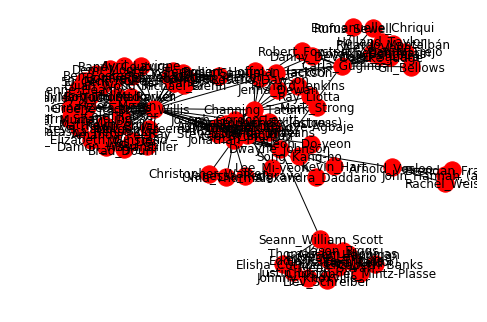

In [18]:
CompositeGraph = nx.Graph()
CompositeGraph = nx.compose(CompositeGraph,DwayneJ)
#print(CompositeGraph.size());
#nx.draw(CompositeGraph,with_labels = True)   
invalidName = []
for actor in DwayneJ:
    #print(actor);
    #Filter out the bad characters
    if((re.search( '[*\(\)\.]', actor)) == None):
        nGraph = getActorGraph(actor,endpoint)
       # print(nGraph.size());
    else:
        nGraph = getActorGraph(actor,endpoint,True)
        invalidName.append(actor)
    CompositeGraph = nx.compose(nGraph,CompositeGraph);
#print(CompositeGraph.size());
#for actor in invalidName:
    
nx.draw(CompositeGraph,with_labels = True)

nx.write_graphml(CompositeGraph, "Depth2Dwayne.graphml")